# Unsupervised Learning Solution
### EDSA Movie Recommendation 2022 
####Team NM5

© Explore Data Science Academy

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2Fbca114f2e4f6b9b46f2cc76527d7401e%2FImage_header.png?generation=1593773828621598&alt=media" width=100%/> 




<a id="cont"></a>
## Table of Content

<a href=#one>1. Introduction</a>
       
<a href=#two>1. Import Packages</a>

<a href=#three>2. Load Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    


<a id="one"></a>
# 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>


1.1 Overview
In today’s world, recommender frameworks are socially and financially basic to guarantee that people can make optimized choices surrounding the content they interact with on an everyday premise. One such application that people trust is motion picture proposals; where brilliant calculations can offer assistance to movie fans to discover other awesome titles from a wide database.

In this project, We will create a recommendation algorithm based on Content and Collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

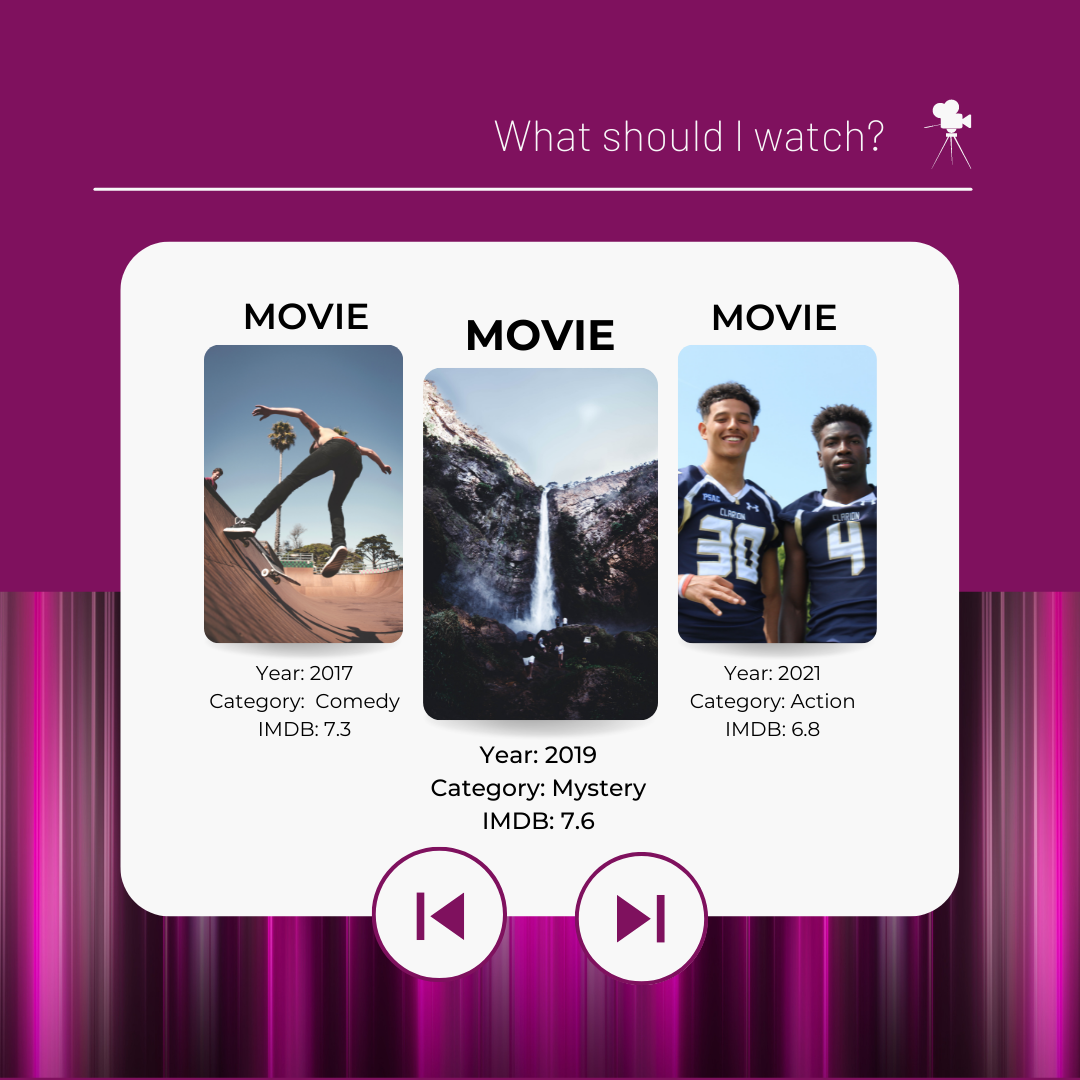



#### 1.2 Problem Statement

Social Media gaints of today all have one thing in common; a recommendation machine.

We will be building robust model to match the growing AI in our era of immense economic potential.Users of our system will be able to recieving personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

#### 1.3 Model Versioning with COMET

To Begin with, We will be using Comet, a great tool for model versioning and experimentation as it records the parameters and conditions from each of your experiements- allowing us to reproduce your results, or go back to a previous version of our experiment.

In [ ]:
# # Install Comet
!pip install comet_ml

In [ ]:
# Import Comet package
# # Install Comet
from comet_ml import Experiment

# Setting the API key

experiment = Experiment(
    api_key="LOfWnyJWVQ0yynqkHLhoe1J2B",
    project_name="movie-recommender-systems-team-4",
    workspace="moreira",
    log_code=True,
    log_graph=True,
    auto_param_logging=True,
    auto_metric_logging=True
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/moreira/movie-recommender-systems-team-4/c1edb8ec51f3451495580931b1349d72
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1F4trXH9F_2vk1mFqnVsh35228i1ng4mI
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back t

In [ ]:
#required installations
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633711 sha256=acc1d7bfc996e0096dfad0dadecce79faa01bf5e7703928f8285a9dfe73a2e96
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 1.5 Approach


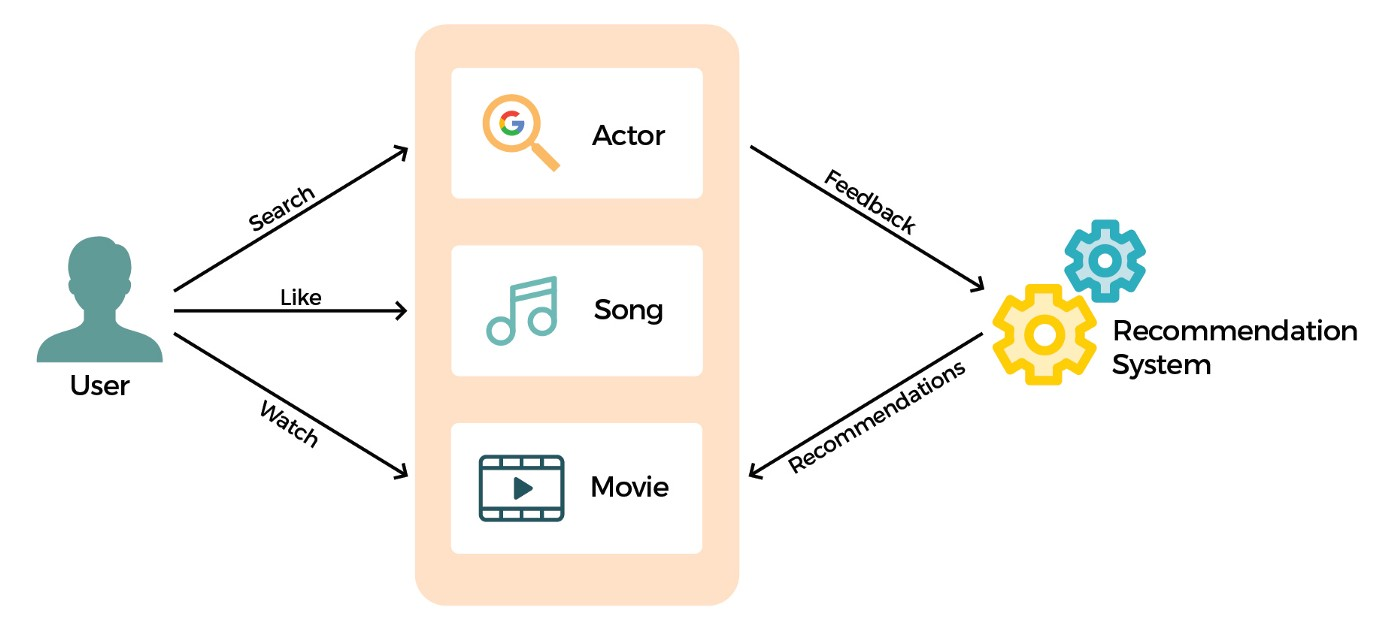
Recommender systems encompass a class of techniques and algorithms that can suggest 'relevant' items to users, in this case, movies. They pedict future behaviour based on past data and a combination of multiple algorithms.

We will commence by builing;

* A `Content-Based Recommendation System` which basically entails computing the similarity between items(`movies`) using the consine similarity to plot similarity matrix between movies and similiaarity in content expressed as movie index. meaning we will be considering `Item Contents` such as (Tags, Keyword, Cast, Genre, the nitigrities etc) 

* Then Several `Collaborative Filtering Recommendation Systems` which harness all `Past data` of user interactions with the movies they have watch and ratings they have made both directly (actually rating the movie) or indirectly (i.e how long they dwelled on the movie).



<a id="two"></a>
# 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

In this section, we will be importing libraries which are a collections of modules in their classes and based on their functionality. For this Analysis and Modelling, we wil be requiring;

   ` For Data Manupulation, libraries such as Pandas, Numpy etc.`
   
`For Data Visualization, libraries such as mathplotlib, seaborn`
    
`libraries for data prepartion, feature selection, model building, Performance Calculation and more.`

**SEE** in-line comments BELOW for purpose per importation.

In [ ]:
""" 
For a seamless run, 
All required libraries will be imported here. 
"""

# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                                                   # <-- for loading CSV data
import numpy as np                                                    # <-- Used for mathematical operations
import matplotlib.pyplot as plt                                       # <-- for Graphical Representation                                                 
import seaborn as sns                                                 # <-- for specialized plots                                                         
import scipy as sp                                                    # <-- Used in our code for numerical efficientcy. 
import plotly.express as px                                           # <-- for specialized plots  
from PIL import Image
from wordcloud import WordCloud, STOPWORDS                            # <-- To Check most pertinent parts of textual data
sns.set()                                                             # <-- set plot style

# Libraries for data preparation
from datetime import datetime
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet

# Libraries for featurization and similarity computation
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from fuzzywuzzy import fuzz

# Libraries for Model Building
import surprise
from surprise import Reader, Dataset, SVD
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

# Libraries used during sorting procedures.
import operator                                                       # <-- Convienient item retrieval during iteration 
import heapq                                                          # <-- Efficient sorting of large lists

# Libraries for calculating performance metrics
import time
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise import accuracy

# Libraries to Save/Restore Models
import pickle                                                         # <-- To Export Model
from surprise import dump                                             # <-- Aids dump model to be saved as PKL.
import os

import gc                                                             # <-- Gabage Collector
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


<a id="three"></a>
# 3. Load Data
<a href=#cont>Back to Table of Contents</a>

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

We'll be using this special version of the MovieLens dataset which is enriched with additional data, and resampled for fair evaluation purposes.

**Source**

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

**Supplied Files**

* `genome_scores.csv` - a score mapping the strength between movies and tag-related properties.
* `genome_tags.csv` - user assigned tags for genome-related scores
* `imdb_data.csv` - Additional movie metadata scraped from IMDB using the links.csv file.
* `links.csv` - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* `sample_submission.csv` - Sample of the submission format for the hackathon.
* `tags.csv` - User assigned for the movies within the dataset.
* `test.csv` - The test split of the dataset. Contains user and movie IDs with no rating data.
* `train.csv` - The training split of the dataset. Contains user and movie IDs with associated rating data.

Kindly Make Reference to [Kaggle](https://www.kaggle.com/competitions/edsa-movie-recommendation-2022/data) for More Information concernning the data.

In [ ]:
# #Kaggle setup
! pip install -q kaggle

# #Create Kaggle Folder
!mkdir ~/.kaggle
# #Copy Kaggle.json file to new folder
! cp kaggle.json ~/.kaggle/
# #Grant Permissions
! chmod 600  ~/.kaggle/kaggle.json
# #Datasets List
! kaggle datasets list

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Load Base Train & Test Data locally
train_df_act = pd.read_csv('/train.csv')
test_df = pd.read_csv('/test.csv')

In [ ]:
# Load Meta Data locally
genome_scores_df = pd.read_csv('/genome_scores.csv')
genome_tags_df = pd.read_csv('/genome_tags.csv')
imdb_data_df = pd.read_csv('/imdb_data.csv')
links_df = pd.read_csv('/links.csv')
movies_df = pd.read_csv('/movies.csv')
tags_df = pd.read_csv(r'/tags.csv')



<a id="four"></a>
# 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. On the following EDA we will explore the **MovieLens Dataset** to check for insight. We will be carrying out an extensive data analysis, descriptive statistics and data visualisations, all in the bid to give us an idea of what useful part of the data will be preprocessed in the Data Processing & feature engineering section in preparation for modeling. 

##### 4.1 Review Loaded Data

This first and the most important step in this project as a proper understanding on the data available will increase the chances of what we can do with it.

In [ ]:
train_df_act.head(3)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


Our Base training Model Includes `userId`, `movieId` , `rating` , `timestamp`. All features are relevant to a variable degree, but we can't make conclusive decisions yet

Average rating in dataset: 3.5333951730983424


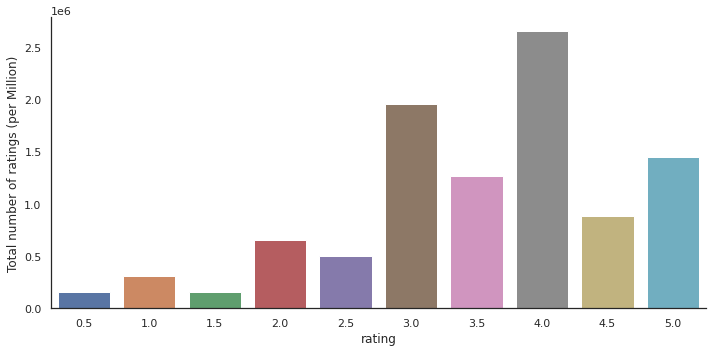

In [ ]:
# Let's Visualise the Distribution of Rating in our Actual Train Data
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=train_df_act, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings (per Million)")
print (f'Average rating in dataset: {np.mean(train_df_act["rating"])}')

In [ ]:
# Establishing Range of Ratings
min_rating = train_df_act.rating.min()
max_rating = train_df_act.rating.max()
print(f'The RATING ranges between {min_rating} and {max_rating}')

The RATING ranges between 0.5 and 5.0


So we have our ITEM (Movies) rating ranging between `0.5` to `5.0` and most likely to be the target feature for Basic Recommendation i.e. if we are to recommend based on `userId` and `movieId` iteractions alone. 

Also as we can see, majority of our Observations fall within the RATING range of `3.0` and `5.0` with `4.0` having the highest occurance with over `2.6 Million rating occurance`. This means that modelling by rating alone will not be entirely be representative of what the viewer may want since majority of ratings fall within the higher rates. Movie Contents/Types, User Preferences and other collaborative options, will have to be called into actions as distinguishing factor to tailoring down a recommendation to a user specification, which is what we want.

In [ ]:
# Check the shape/sizes of the data sets
"""" 
Creating a DataFrame which outlines the sizes of each of our data
"""

# List Names of Data sets
D_names = ['Train Data', 'Test Data','Genome Score', 'Tags Data', 
       'links Data', 'Movies Data', 'IMDB Data', 'Genome Tags' ]
# Generate a list of each data size
sizes = [len(train_df_act), len(test_df), len(genome_scores_df), 
         len(tags_df), len(links_df), len(movies_df), len(imdb_data_df),
         len(genome_tags_df), ]
# Place & view result in Pandas DataFrame
size_df = pd.DataFrame(list(zip(D_names, sizes)), columns=['Data', 'Size'])
size_df

,Data,Size
0,Train Data,10000038
1,Test Data,5000019
2,Genome Score,13496997
3,Tags Data,1093360
4,links Data,62423
5,Movies Data,62423
6,IMDB Data,27278
7,Genome Tags,1128


In [ ]:
# Let's Visualize DataSet against Sizes

fig = px.bar(size_df, x=size_df['Data'], y=size_df['Size'],
             color=size_df['Data'],
             title='Available Datasets and Sizes')
fig.show()

We have available  `10 million plus` observations for training & validation, and `5 Million plus` of Test data to act as Unseen/Real world Test case.

`Genome Scores` which is a score mapping the strength between movies and tag-related properties being over `15 Million Plus` in size. This is a whole lot of Data set to manipulate through; First relating the Database, Cleaning and Processing it and finally modelling, for which each model generates its own form of sparse matrix, factorizing the interactions between the relevant features and proferring the desired recommendation. This will no doubt be computationally intensive. e.g assumming each feature in the genome score were to be applied and a sparse matrix were to be created between the features, we will be looking at a matrix in the shape of 15 million x 15 million, Now that is prior to integrating it to other tables. This is alot and have to be managed with utmost care. 

We will have to adopt some form of `DIMENSIONALITY REDUCTION` to Reducing the number of features but yet retaining the data integrity( No Loss in Insight to a reasonable Degree)

Let's Look at some relevant available dataset first adopt what features are essential to our operation

In [ ]:
"""
Reviewing Dataset
"""
# To enable us view the full value of dataframe
pd.set_option('display.max_colwidth', -1)     

# View the first 5 entries in each dataset
print('TRAIN DATA TABLE'), display(train_df_act.head())
print('MOVIES DATA TABLE'), display(movies_df.head())
print('IMDB DATA TABLE'), display(imdb_data_df.head())
print('TAG DATA TABLE'), display(tags_df.head())


TRAIN DATA TABLE


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


MOVIES DATA TABLE


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


IMDB DATA TABLE


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betrayal|mother son relationship
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


TAG DATA TABLE


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


(None, None)



1. From the Movies Table:
Obviously the `genres` is will be an important ingredient to establish Movie Content; Viewers might be more interested in `Comedy` and not recommending movies having `ROMANCE` as a genre to CHILDREN. We could be sued for that. In Total we have availble over `62 thousand` distinct movies available for our training.

2. From the IMDB Table: 
we can see, People/Users may tend to watch movies based on their `CAST` or `Director` but predominately the CAST and most people may be drawn to more `fight` oriented movies than `cowboy` or `animation`. Thus We will look to pick the `Title_cast` & `plot_keywords` Columns as potential features

3. The `Timestamp` might prove important as varying individuals will tend to view certain `tag` of movies at unique times and as such we should have our model providing recommendation to suit the TIMING (Think of HORROR movies and Night-times). This table may be having good info that could positively influence our training model

That been said, Let's go into more statistical Review of our Dataset.

In [ ]:
# Some Descriptive Stats of our base train data
round(train_df_act['rating'].describe(), 1)

count    10000038.0
mean     3.5       
std      1.1       
min      0.5       
25%      3.0       
50%      3.5       
75%      4.0       
max      5.0       
Name: rating, dtype: float64

A Maximum of 25% of our viewers will tend to rate movies below 3.0 `i.e over 75% of People, according to our stats will tend to rate a movie above 3.0`. This is also visualized in the `RATING DISTRIBUTION BAR GRAPH`

In [ ]:
'''
NEXT: Let's Count the Unique Characters for our features of Interest
'''

# Declare count of unique entries for features
unique_users = len(train_df_act['userId'].unique().tolist())
unique_movies = len(movies_df['movieId'].unique().tolist())
unique_actors = len(imdb_data_df['title_cast'].unique().tolist())
unique_directors = len(imdb_data_df['director'].unique().tolist())
unique_Movie_tags = len(tags_df['tag'].unique().tolist())

# Output Result in Dataframe
unique_characters = pd.DataFrame({"Users": [unique_users],
                                  "Tags" : [unique_Movie_tags],
                                  "Movies": [unique_movies],
                                  "Actors" : [unique_actors],
                                  "Directors" : [unique_directors],
                                 }, 
                                index=['Count of Unique Characters'])

# Print result
display(unique_characters.transpose())

,Count of Unique Characters
Users,162541
Tags,73051
Movies,62423
Actors,17144
Directors,11787


For our experiment; we have a total of `162,541` participants in the rating of `62,423` unique movies. This is a pinch of vast number of movies and possible users but this is a reasonable satisfactory to fulfil the agenda of this project which to Model a Recommendation Machine which acts based on several conditions to tailoring down recommendations to suit each user.

Let's EXPLORE FURTHER on our USER, ITEM, and possibly TIMING or any other factor of great light. The scope this EDA is really vast and not limited to the reasearch as recorded on this NOTEBOOK.

In [ ]:
## Grouping users by count within range

##Create DataFrame with count by userID
user_count = pd.DataFrame(train_df_act['userId'].value_counts()).reset_index()
user_count.rename(columns={'index':'userId','userId':'count'}, inplace=True)

# Defining Group Between 1 - 50
first_group = user_count.loc[(user_count['count'] > 0) &                     
            (user_count['count'] < 50), 'userId'].value_counts().sum()
# Between 50 - 500
second_group = user_count.loc[(user_count['count'] >= 50) &  
            (user_count['count'] < 500), 'userId'].value_counts().sum()
# Between 500 - 1000
third_group = user_count.loc[(user_count['count'] >= 500) & 
            (user_count['count'] < 1000), 'userId'].value_counts().sum()
# Between 1000 - 1500
fourth_group = user_count.loc[(user_count['count'] >= 1000) & 
            (user_count['count'] < 1500), 'userId'].value_counts().sum()
# From 1500 above
fifth_group = user_count.loc[(user_count['count'] >= 1500),
            'userId'].value_counts().sum()

# To give us insight in the spread, we used figures to determine the spread.
trial_error = np.array([['First Group', first_group, 'Between 1 and 50'],
                        ['Second Group', second_group, 'Between 50 and 500'],
                        ['Third Group', third_group, 'Between 500 and 1000'],
                        ['Fourth Group', fourth_group, 'Between 1000 and 1500'],
                        ['Fifth Group', fifth_group, 'Greater than 1500']])

# Place array into Dataframe
trial_error_df = pd.DataFrame({'UserId Voting Group': trial_error[:, 0],
                               'Number per Group': trial_error[:, 1],
                               'Group Category': trial_error[:, 2]})
# Plot Bar Graph of Groupings
fig = px.bar(trial_error_df, x=trial_error_df["UserId Voting Group"], 
             y=trial_error_df["Number per Group"], color=trial_error_df["UserId Voting Group"], 
             title='Users Rating Distribution')
fig.show()
trial_error_df

,UserId Voting Group,Number per Group,Group Category
0,First Group,110010,Between 1 and 50
1,Second Group,50973,Between 50 and 500
2,Third Group,1338,Between 500 and 1000
3,Fourth Group,159,Between 1000 and 1500
4,Fifth Group,61,Greater than 1500


From the above; we can see out of `162,541` participants; `Over 110,000 of them Rated below 50 times` which is over 67% of the the participants. Meaning, which is as representative as whats occuring in reality as just about `33% of people who see a movie will tend to Rate them`, we are assuming, rating over 50 movies for a given season will be termed ACTIVE. This is purely a Hypothetical, based on this data and should pass over several hypothesis testing to factualize this looming facts.

What this simply means; `You are most likely to get feedbacks from 33% of your Customers`.

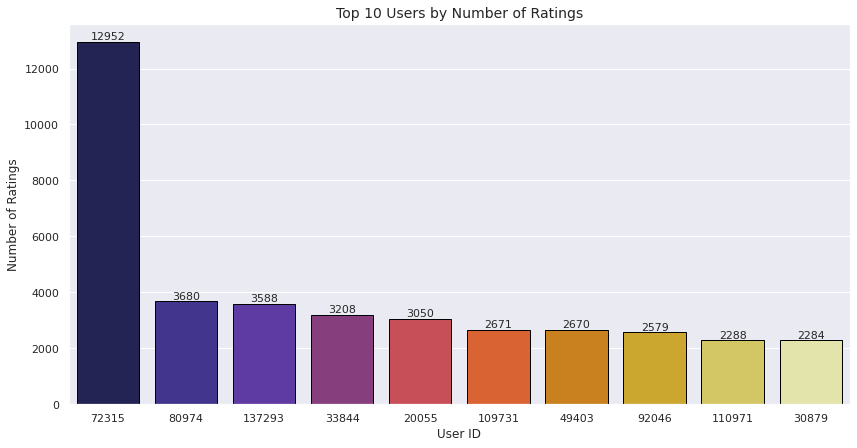

In [ ]:
# Define Function that Reveals Users with Top Counts of Ratings
def user_ratings_count(df, n):
    plt.figure(figsize=(14,7))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    plt.show()

user_ratings_count(train_df_act,10)


Our Top Users each rated on an average of about `2900 Times` except for User with `ID: 72315`. It's eitherour User with `ID: 72315` Practically spends his/her time on movies and rating them or we have some form of an Outlier here.  We wil assume this to be an Outlier, hence removing Rows having this Users contribution. SEE Data Processing for Execution.

#### Further about our MOVIES

Using the Train Data as Base let's seive out just whats needed from other Movies & Metadata to trim off alot of Excess data. Recall we have to deal with space and computational challanges. This will fit every essential inot the 10 million Observations,. This is still alot to deal with, but its a good start.  

First we Merge our Movie Title & Genres from our movie Table to Our Base Train Data.

In [ ]:
# Let us merge our train data with the movies data

pd.set_option('display.max_colwidth', -1)   # To enable us view the full value of dataframe
movies = pd.merge(train_df_act, movies_df, on='movieId', how='left')
movies.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",Drama|Horror|Mystery|Thriller


NEXT: we add our Cast, Director, runtime, budget and Plot_keywords from our IMDB DATA into our MAIN TRAIN DATA

In [ ]:
# We will add an additional data i.e df_imdb data
complete_movie = pd.merge(movies, imdb_data_df[['movieId', 'title_cast', 
                                                'director', 'plot_keywords']], 
                                                  on='movieId', how='left')
complete_movie.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjour|Mark Donovan|Ann Elsley|Colin Farrell|Jean-Marc Favorin|Ralph Fiennes|Brendan Gleeson|Eric Godon|Zeljko Ivanek|Sachi Kimura|Anna Madeley|Louis Nummy|Clémence Poésy,Martin McDonagh,dwarf|bruges|irish|hitman
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,fatherhood|doberman|dog|mansion


NEXT: Let's Proceed to seeing the movies with the Highest Ratings and also check for possible outliers in our dataset 

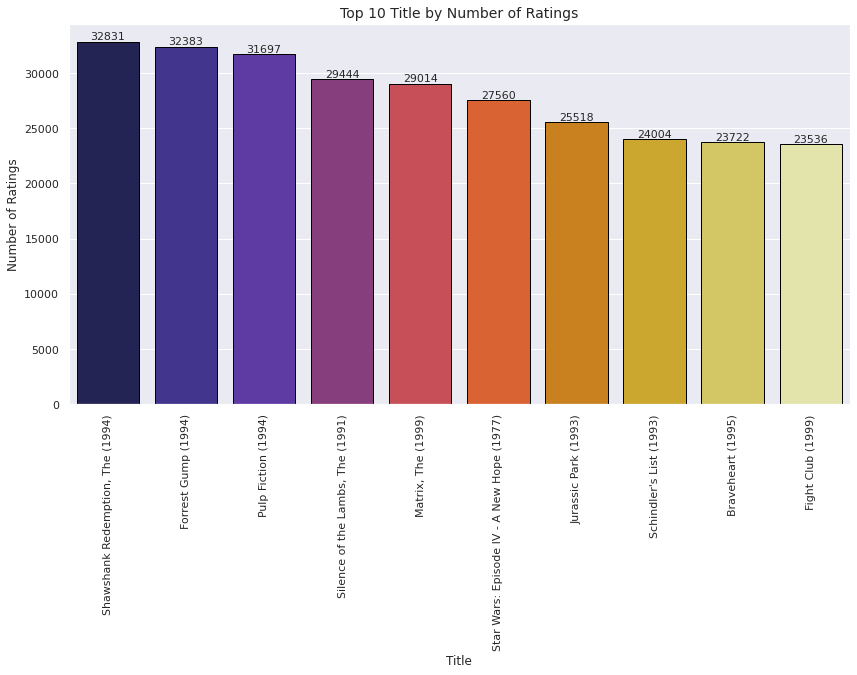

In [ ]:
# Get the top ratings of movies

# Define the Function
def top_rating_plot(df,column, n):
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel(column.title())
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=90)
    plt.show()
# Call Function; Get Top 10
top_rating_plot(movies,'title',10)

This reveals that all the movies in the top 10 by Number of Ratings were released in the 90's with only one Indicating certain likeness for users to this class of classical movies.


#### Exploring Further on Genre Categories

In [ ]:
# Get the categories of Movie Genre per movie ID.
# Each Genre should stand unique to enable classification
movie_genres = pd.DataFrame(movies_df['genres'].str.split("|").tolist(),
                      index=movies_df['movieId']).stack()
movie_genres = movie_genres.reset_index([0, 'movieId'])
movie_genres.columns = ['movieId', 'Genre']
movie_genres.head()

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


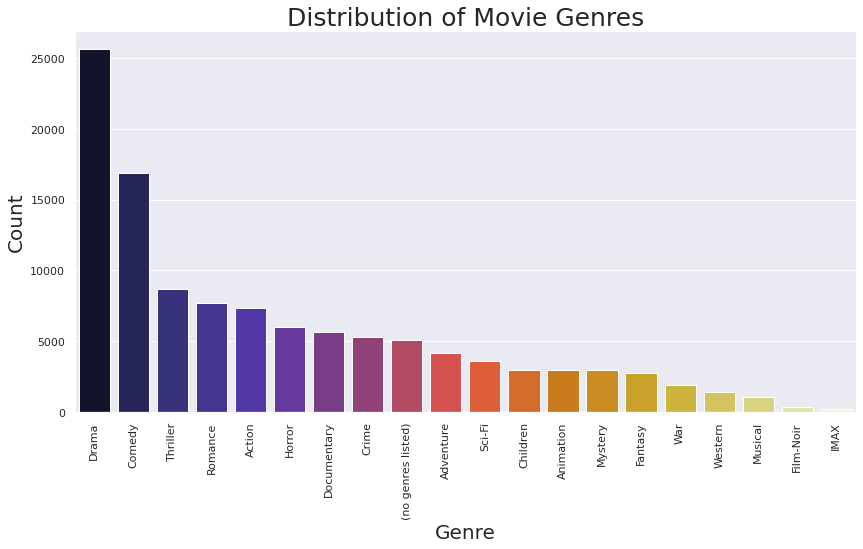

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre', data=movie_genres, palette='CMRmap',
              order=movie_genres['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

Looking at the graph, we can tell that `Drama, Comedy, Thriller and Romance` stand out as the popular movie genres

Several factors attributes to why these genres stand out. Hence, Let us get an interesting wordcloud to showcase movie titles and the count of ratings to see if we could get any further insight on the movies

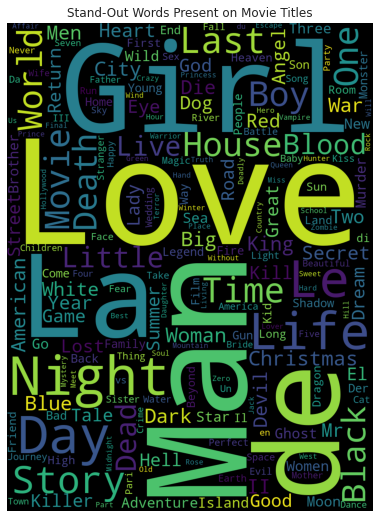

In [ ]:
# Wordcloud of movie titles
movie = movies_df['title'] = movies_df['title'].astype('str')
wordcloud = ' '.join(movie)
title_wordcloud = WordCloud(stopwords = STOPWORDS,background_color = 'Black',
                            height = 1200, width = 900).generate(wordcloud)
plt.figure(figsize = (14,7), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Stand-Out Words Present on Movie Titles')
plt.tight_layout(pad=0)
plt.show()

 Movies with words such as `LOVE`, `STORY`, `GIRL`, `MAN`, `NIGHT`, `LIFE`, gains more views and will tend to be rated more than others.

#### More on our Time Stamps

While Bats are awake at night, viewers, enjoy entertainment at different times, days, and seasons.So let's study the time series activities of our participants.

In [ ]:
#From movie data, convert timestamp to datetime
movies['time_dt'] = movies['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# Extract year, month, day, day-of-week Respectively
movies['Year'] = movies['time_dt'].dt.year
movies['Month'] = movies['time_dt'].dt.month
movies['Day'] = movies['time_dt'].dt.day
movies['Day of Week'] = movies['time_dt'].dt.dayofweek

In [ ]:
# View DateTime Columns
movies.head(2)

,userId,movieId,rating,timestamp,title,genres,time_dt,Year,Month,Day,Day of Week
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,2018-02-11 11:53:12,2018,2,11,6
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,2008-03-23 02:18:59,2008,3,23,6


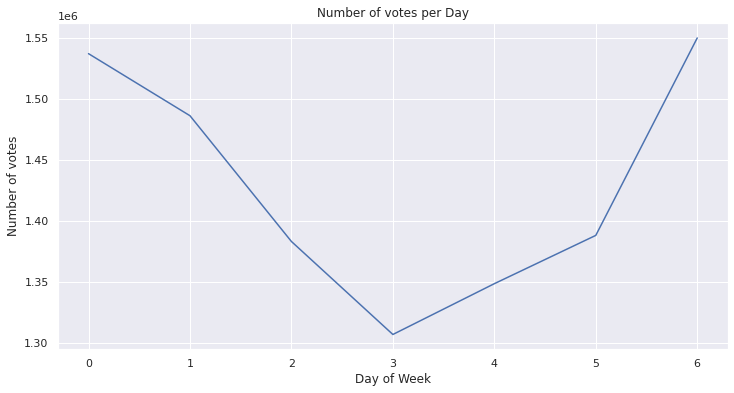

In [ ]:
# Group rating by Day-of-Week
dt = movies.groupby(['Day of Week'])['rating'].count().reset_index()
# Make a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['Day of Week'],dt['rating']); plt.xlabel('Day of Week'); plt.ylabel('Number of votes'); plt.title('Number of votes per Day')
plt.show()

People will Tend to View and Rate Movies during the Weekends 


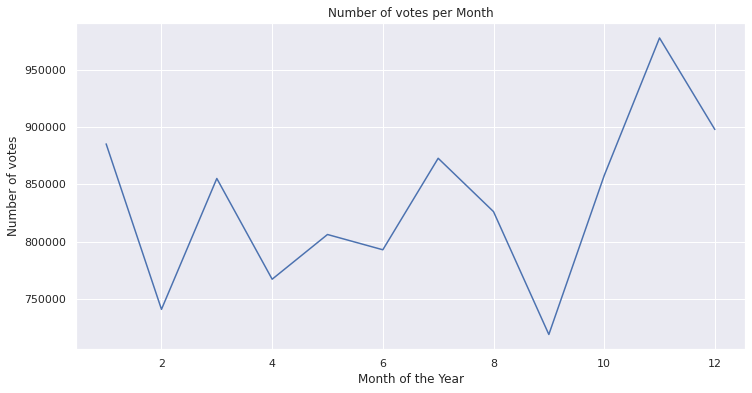

In [ ]:
# Group rating by Month
dt = movies.groupby(['Month'])['rating'].count().reset_index()
# Make a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['Month'],dt['rating']); plt.xlabel('Month of the Year') 
plt.ylabel('Number of votes'); plt.title('Number of votes per Month')
plt.show()

As we can see the `Ember Months` Have alot of people on the look out for Movies, From this analysis we can see a stip decline in votes which is as equal to Views, same for the month of August leading to September (The New Financial Year) and most people will be stock on setting their records straight, reports preparation etc, it might not be a good time for movies. 

We can see the Holiday Periods with the sharp peaks `Easter` and `The Summer break` i.e Students during summer are typically off between eight and nine weeks (late-June to early-September)

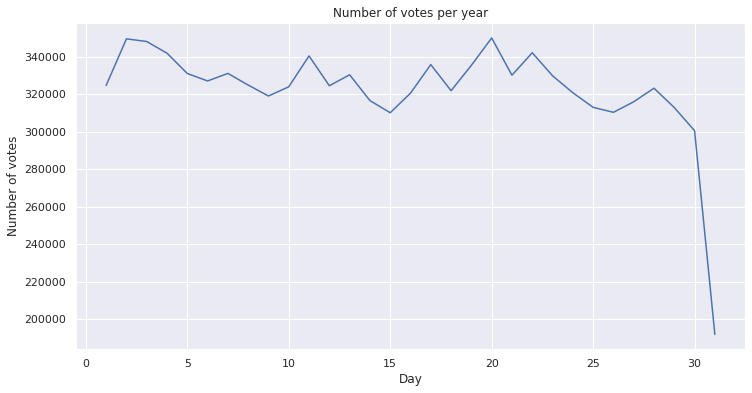

In [ ]:
# Group rating by DAY
dt = movies.groupby(['Day'])['rating'].count().reset_index()
# Make a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['Day'],dt['rating']); plt.xlabel('Day'); plt.ylabel('Number of votes'); plt.title('Number of votes per year')
plt.show()

There is a decline in movies viewed late in each months, could correspond with end of Subscription periods and also a period of less money in the hands of salary earners

#### Key Observations 
* RATING range of `3.0` and `5.0` with `4.0` having the highest occurance with over `2.6 Million rating occurance`
* THREE MOST Important Features here are the; `MovieId`, `UserId` and `Rating`, The rest will be built on them.
* A total of `162,541 participant` rated `62,423 unique movies`, out o which `110,010 rated < 50 times`
* You are most likely to get feedbacks from 33% of your Customers
* Possible Outlier of User ID: 72315
* People Tend to Love movies of the 90's or with similar contents.
* `Drama, Comedy, Thriller and Romance` stand out as the popular movie genres
* Titles & Items with Sex Contents proof to get Users attention
* Active periods include `Target the Weekends` and `Holiday sessons`



NOW, Armed with the knowledge of what our data constitute, let's proceed to making meaningful data processing required to accomplish our task.

<a id="five"></a>
## 5. DATA PROCESSING
<a href=#cont>Back to Table of Contents</a>

The primary funtion of data processing is to provide Cleaner, Functional, Higher-Quality data, which is key to any successesful of data engineering and model building. It also enable more valuable insights to be extracted as well. Hence, Let's get digging.